2025-08-06 12:27:27.132710: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-06 12:27:27.137670: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-06 12:27:27.152659: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754483247.173006  226385 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754483247.177170  226385 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1754483247.192479  226385 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

Found 3187 images belonging to 11 classes.


/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2025-08-06 12:27:33.401309: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 201867264 exceeds 10% of free system memory.


100/100 ━━━━━━━━━━━━━━━━━━━━ 55s 545ms/step - accuracy: 0.7468 - loss: 0.7955
✅ Test Accuracy: 0.75
✅ Test Loss: 0.80
100/100 ━━━━━━━━━━━━━━━━━━━━ 51s 506ms/step
🔍 Classification Report:
                                  precision    recall  f1-score   support

                     animal fish       0.97      0.96      0.97       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.58      0.99      0.73       298
   fish sea_food gilt_head_bream       0.85      0.30      0.45       305
   fish sea_food hourse_mackerel       0.71      0.80      0.75       286
        fish sea_food red_mullet       0.85      0.93      0.89       291
     fish sea_food red_sea_bream       0.62      0.84      0.71       273
          fish sea_food sea_bass       0.83      0.47      0.60       327
            fish sea_food shrimp       0.71      0.98      0.82       289
fish sea_food striped_red_mullet       0.83      0.31      0.45       29

/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


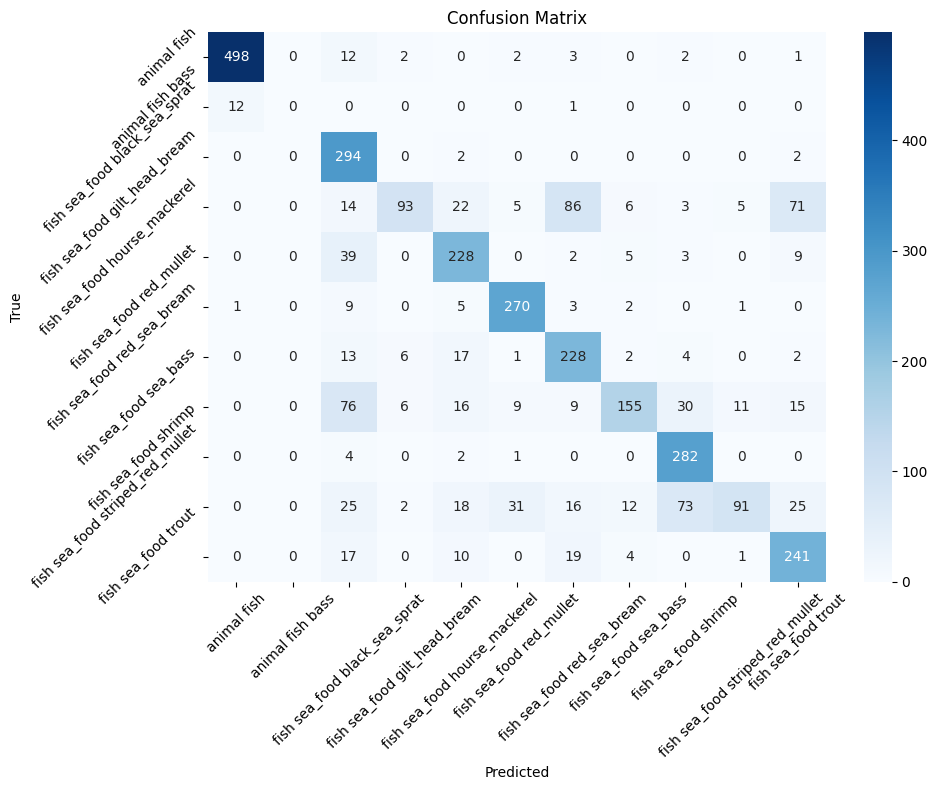

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 636ms/step


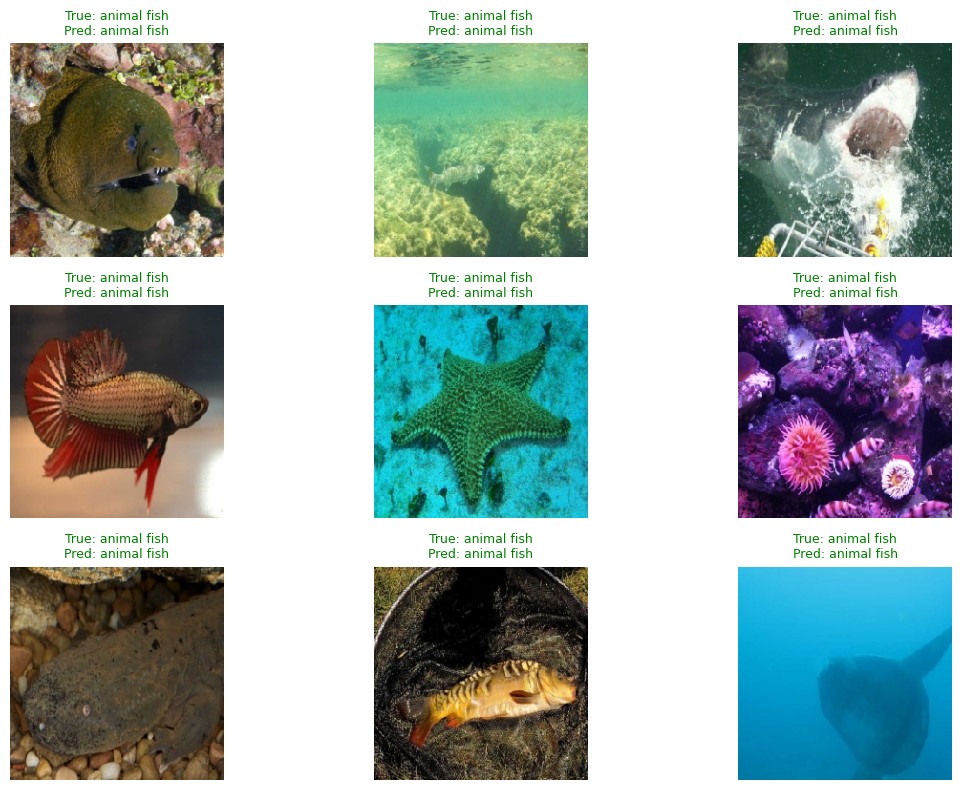

In [1]:
# 1. Import Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 2. Define Paths
DATA_DIR = "../data/images.cv_jzk6llhf18tm3k0kyttxz/data"
TEST_DIR = os.path.join(DATA_DIR, "test")
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# 3. Load Best Model
model = load_model("best_model_cnn.h5")  # or use best_model_tl.h5 if you used transfer learning

# 4. Prepare Test Data Generator
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# 5. Evaluate the Model
loss, accuracy = model.evaluate(test_generator)
print(f"✅ Test Accuracy: {accuracy:.2f}")
print(f"✅ Test Loss: {loss:.2f}")

# 6. Predict Classes
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# 7. Classification Report
print("🔍 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

# 8. Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

# 9. Visualize Predictions
def visualize_predictions(generator, model, class_labels, num_images=9):
    x_batch, y_batch = next(generator)
    predictions = model.predict(x_batch)
    plt.figure(figsize=(12, 8))

    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        plt.imshow(x_batch[i])
        true_label = class_labels[np.argmax(y_batch[i])]
        predicted_label = class_labels[np.argmax(predictions[i])]
        color = 'green' if true_label == predicted_label else 'red'
        plt.title(f"True: {true_label}\nPred: {predicted_label}", color=color, fontsize=9)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Reset generator for visualization
test_generator.reset()
visualize_predictions(test_generator, model, class_labels)
